<a href="https://colab.research.google.com/github/I-ULISES-I/Colabfiles/blob/main/Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 🔧 Instrucciones

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF


# **1. Carga y Exploración del Dataset**

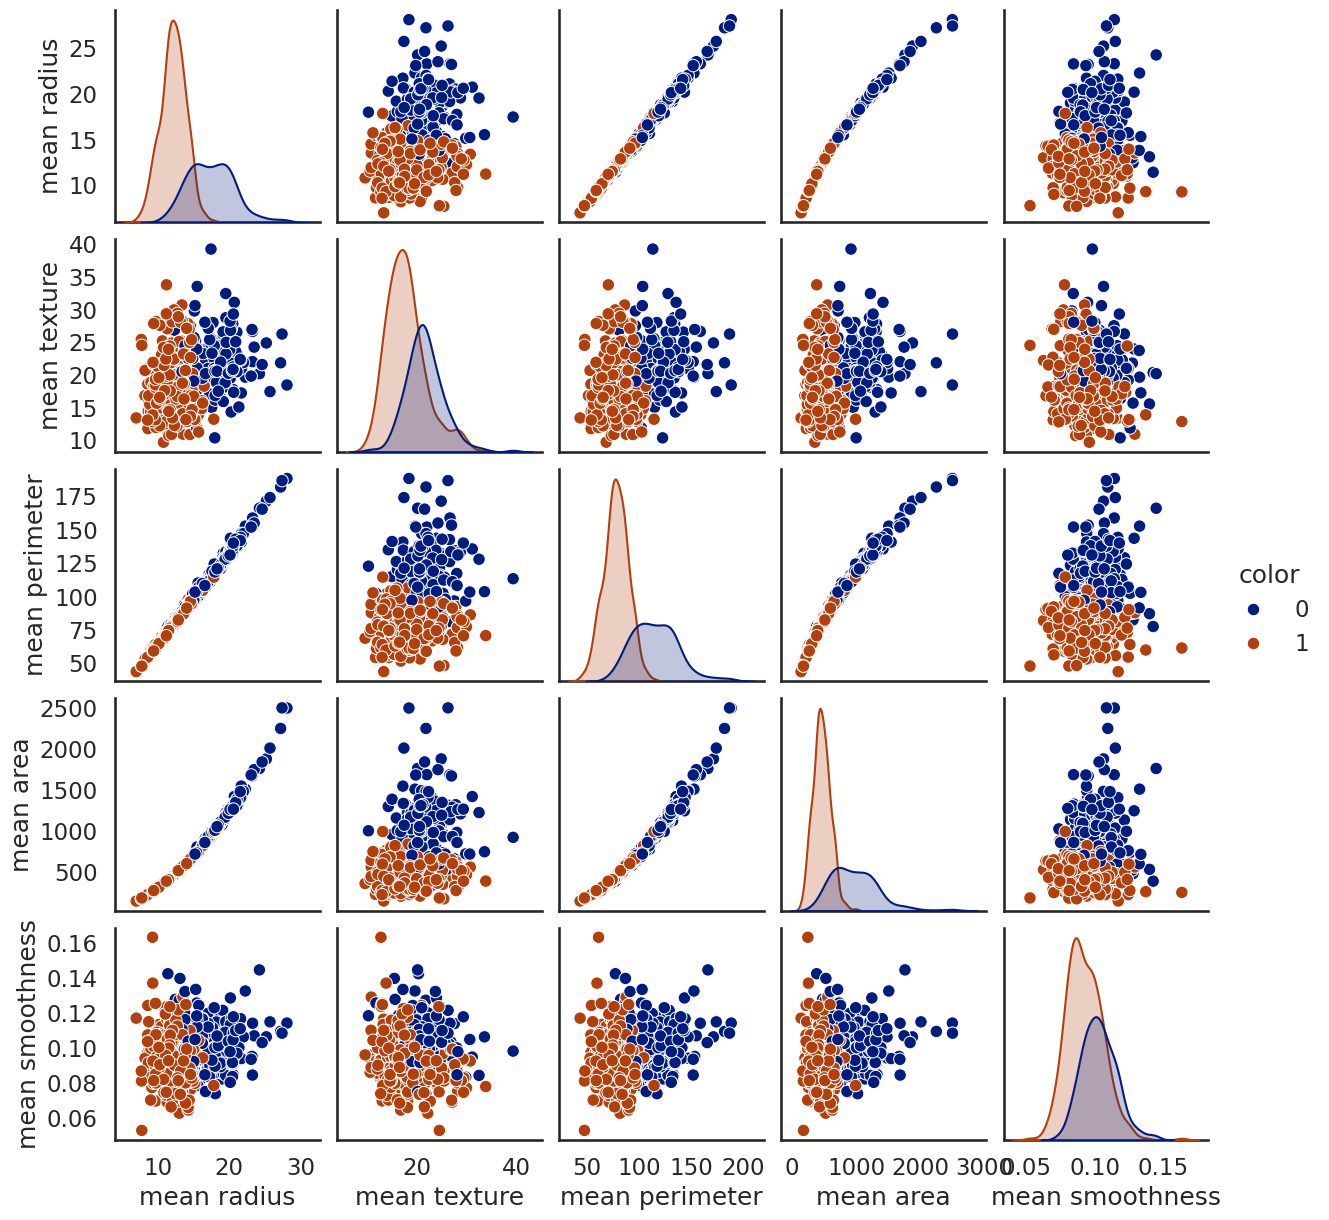

In [1]:
#Importación de librerías.
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#Carga de conjunto de datos.
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names
breast_df = pd.DataFrame(X, columns=data.feature_names)
breast_df['color'] = y

#Creación y diseño de pairplot (solo 5 primeras características).
subset = breast_df.iloc[:, :5].copy()
subset['color'] = breast_df['color']
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
sns.pairplot(subset, hue='color')
sns.reset_defaults()

# **2. Entrenamiento Base con SVM**

In [2]:
#Creación de pipeline.
pipeline = Pipeline([
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

#Definición de validación cruzada.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Entrenamiento del modelo.
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

#Evaluación del modelo.
report_before = classification_report(y, y_pred, digits=3, output_dict=True)
print(classification_report(y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.960     0.802     0.874       212
           1      0.893     0.980     0.935       357

    accuracy                          0.914       569
   macro avg      0.927     0.891     0.904       569
weighted avg      0.918     0.914     0.912       569



# **3. Análisis del Problema de Desbalance**

*   Interpreta las métricas: ¿qué clase tiene peor desempeño? La clase 0. ¿por qué? Porque, a pesar de que tiene una buena métrica de "precision", el "recall" y el "f1-score" son más bajos en comparativa con la clase 1. El modelo predice un 96% correctamente la clase 0, sin embargo, solo está encontrando un 80.2% de tales casos.

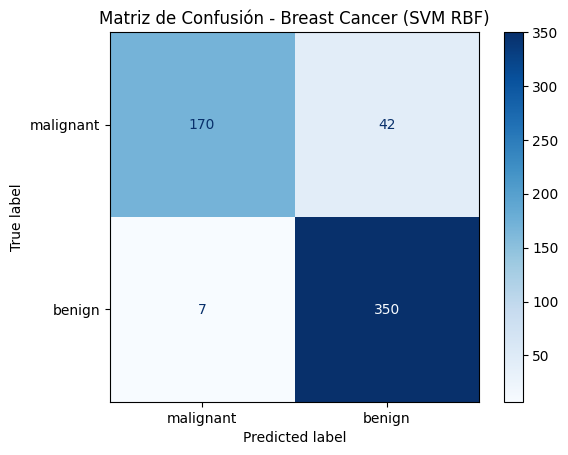

In [3]:
#Cálculo y diseño de matriz de confusión.
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)")
plt.grid(False)
plt.show()

# **4. Aplicación de SMOTE**

In [4]:
#Creación de pipeline.
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

#Definición de validación cruzada.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Entrenamiento del modelo.
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

#Evaluación del modelo.
report_after = classification_report(y, y_pred, digits=3, output_dict=True)
print(classification_report(y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.883     0.854     0.868       212
           1      0.915     0.933     0.924       357

    accuracy                          0.903       569
   macro avg      0.899     0.893     0.896       569
weighted avg      0.903     0.903     0.903       569



# **5. Visualización y Conclusiones**

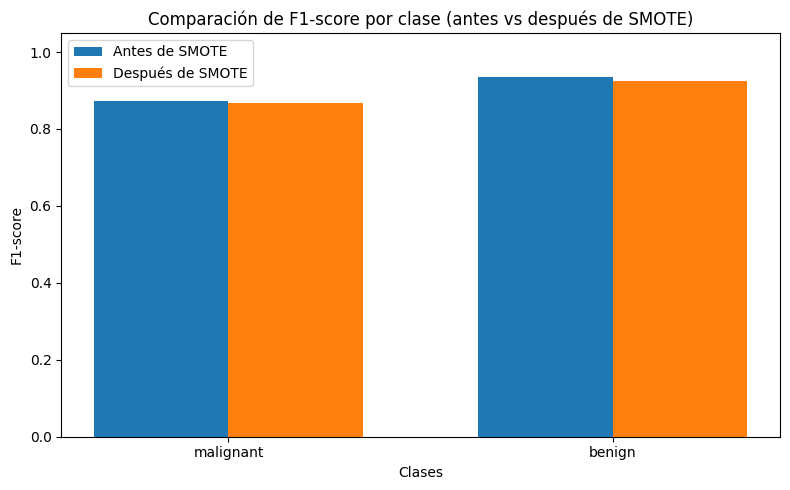

In [5]:
#Obtención de clases.
clases = [k for k in report_before.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']]

#Obtención de f1-score.
f1_score_before = [report_before[clase]['f1-score'] for clase in clases]
f1_score_after = [report_after[clase]['f1-score'] for clase in clases]

#Creación y diseño de gráfica de barras.
x = range(len(clases))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], f1_score_before, width=width, label='Antes de SMOTE')
plt.bar([i + width/2 for i in x], f1_score_after, width=width, label='Después de SMOTE')
plt.xlabel('Clases')
plt.ylabel('F1-score')
plt.title('Comparación de F1-score por clase (antes vs después de SMOTE)')
plt.xticks(x, target_names)
plt.ylim(0, 1.05)
plt.legend()

#Impresión de gráfica de barras.
plt.tight_layout()
plt.show()

Considero que se debe ser cuidadoso al usar SMOTE en un modelo de SVM, ya que, debido a la naturaleza de la técnica y el modelo, pueden causarse conflicto mutuamente. SMOTE genera nuevas muestras a partir de otras, mientras que SVM intenta hacer una separación entre las diferentes clases que existen. Dependiendo de que tan mezcladas estén las clases entre sí, se puede o no ocasionar un problema al momento de aplicar SMOTE.

En cuanto a utilizar otras técnicas, depende mucho del contexto del problema que se está abordando, sin embargo, tomando como base las mencionadas, One-Sided Selection es conveniente usarla cuando se tiene un dataset muy grande y se quiere eliminar datos redundantes o ruidosos de la clase mayoritaria, mientras que ADASYN podría usarse cuando se quiere fortalecer la clase minoritaria.
